# Projet d'Analyse de Données
*OUZEGDOUH Adam* -
*MAZAN Kamil* -
*5 Janvier 2024 (Bonne année !)*

---

## Table des Matières

1. [Etude préliminaire](#Etude-préliminaire)

   1.1 [Introduction](#Introduction)
   
   1.2 [Présentation des données des vins](#Présentation-des-données-des-vins)
   
   1.3 [Fusion des deux tableaux de données](#Fusion-des-deux-tableaux-de-données)
   
   1.4 [Etude sur la mise en forme des données et des variables](#Etude-sur-la-mise-en-forme-des-données-et-des-variables)
   
   1.5 [Problématique principale et plan d'analyse](#Problématique-principale-et-plan-d'analyse)
   
2. [Caractéristiques des Vins](#Caracteristiques_des_Vins)

   2.1 [Analyse des Distributions des Variables](#Analyse_des_Distributions_des_Variables)
   
   2.2 [Distribution des Propriétés par Qualité](#Distribution_des_Proprietes_par_Qualite)
   
3. [Influence sur la Qualité](#Influence_sur_la_Qualite)

   3.1 [Calcul de la Matrice de Corrélation](#Calcul_de_la_Matrice_de_Correlation)
   
   3.2 [Analyse des Corrélations](#Analyse_des_Correlations)
   
   3.3 [Graphes de Dispersion](#Graphes_de_dispersion)
   
4. [Réduction de Dimensionnalité et Facteurs Clés](#Reduction_de_Dimensionnalite_et_Facteurs_Cles)

   4.1 [Standardisation des Données](#Standardisation_des_Donnees)
   
   4.2 [Calcul des Composantes Principales](#Calcul_des_Composantes_Principales)
   
   4.3 [Interprétation des Composantes](#Interpretation_des_Composantes)
   
5. [Modélisation Prédictive de la Qualité](#Modelisation_Predictive_de_la_Qualite)

   5.1 [Préparation des Données](#Preparation_des_Donnees)
   
   5.2 [Entraînement du modèle](#Entrainement_du_Modele)
   
   5.3 [Évaluation du modèle](#Evaluation_du_Modele)
   
   5.3 [Ajustement et Optimisation du Modèle](#Ajustement_et_Optimisation_du_Modele)
   
   5.4 [Analyse de l'Importance des Caractéristiques](#Analyse_de_lImportance_des_Caracteristiques)
   
   5.5 [Formulation d'une Relation Linéaire pour la Prédiction de la Qualité du Vin](#Formulation_dune_Relation_Lineaire_pour_la_Prediction_de_la_Qualite_du_Vin)
   
6. [Classification et Groupement des Vins](#Classification_et_Groupement_des_Vins)

   6.1 [Transformation en modèle de Classification](#Transformation_en_modele_de_classification)
   
   6.2 [Entraînement du modèle](#Entrainement_du_modele_2)
   
   6.3 [Évaluation du modèle](#Evaluation_du_modele_2)
   
   6.4 [Rapport de Classification](#Rapport_de_Classification)
   
   6.5 [Matrice de Confusion](#Matrice_de_Confusion)
   
   6.6 [Interprétation](#Interpretation)

7. [Conclusion](#Conclusion)

---

<a id='etude-preliminaire'></a>
## Etude préliminaire

<a id='introduction'></a>
### Introduction

Dans le domaine fascinant de l'œnologie, l'analyse de la qualité du vin constitue un champ d'étude à la fois riche et complexe.

Les ensembles de données examinés dans cette étude proviennent d'une recherche approfondie sur les vins portugais "Vinho Verde", menée par Paulo Cortez ainsi que d'autres chercheurs en 2009, et sont accessibles via l'archive de l'UCI à l'adresse suivante : http://archive.ics.uci.edu/dataset/186/wine+quality. 

Ces ensembles comprennent des informations détaillées sur les vins rouges et blancs, recueillies à travers des tests physicochimiques et des évaluations sensorielles. Les données se concentrent sur des aspects tels que l'acidité, le sucre résiduel, et la teneur en alcool, tout en excluant des informations comme le type de raisin, la marque ou le prix. La collecte de ces données a été motivée par le désir de comprendre les facteurs influençant la qualité du vin, offrant une base riche pour des études en classification, régression, et sélection de caractéristiques.

<a id='presentation-des-donnees-des-vins'></a>
### Présentation des données des vins

Commençons par examiner les données des deux fichiers CSV concernant la qualité du vin rouge et blanc. Nous allons charger les données, examiner leur structure et les colonnes disponibles.

In [1]:
import pandas as pd

# Chemins des fichiers
file_red_wine = 'wine+quality/winequality-red.csv'
file_white_wine = 'wine+quality/winequality-white.csv'

# Chargement des données
red_wine_data = pd.read_csv(file_red_wine, sep=';')
white_wine_data = pd.read_csv(file_white_wine, sep=';')

# Affichage des informations sur les colonnes pour le vin rouge et blanc
red_wine_data.info()
print('\n')
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column      

Les ensembles de données pour les vins rouges et blancs présentent les mêmes colonnes, qui sont des variables physicochimiques et une évaluation sensorielle de la qualité. Ces colonnes sont :

* Acidité fixe
* Acidité volatile
* Acide citrique
* Sucre résiduel
* Chlorures
* Dioxyde de soufre libre
* Dioxyde de soufre total
* Densité
* pH
* Sulfates
* Alcool
* Qualité (évaluée sur une échelle de 0 à 10)

<a id='fusion-des-deux-tableaux-de-donnees'></a>
### Fusion des deux tableaux de données

Durant tout le reste de l'étude, je compte fusionner les deux tableaux de données pour les raisons suivantes :
* **Analyse globale** : En combinant les données, nous pouvons effectuer des analyses sur les vins de manière plus générale.

* **Modélisation plus robuste** : Pour des tâches telles que la prédiction de la qualité, un ensemble de données combiné offre plus de variabilité et de volume, ce qui peut améliorer la robustesse des modèles de machine learning.

* **Réduction de la complexité** : Fusionner les ensembles de données simplifie l'analyse en évitant de répéter des processus similaires pour chaque type de vin séparément.

J'ai également pris la décision de ne pas ajouter une colonne `wine_type` (rouge ou blanc) car l'objectif est de se concentrer plutôt sur des caractéristiques qui sont les suivants : 
* **Focus sur les propriétés chimiques** : L'objectif peut être d'évaluer la qualité du vin indépendamment de son type, en se concentrant uniquement sur les propriétés chimiques.
* **Simplicité d'analyse** : Ne pas distinguer les types de vin peut simplifier l'analyse, en particulier si l'on s'intéresse à des tendances générales ou à des caractéristiques communes aux vins de qualité.
* **Hypothèse d'indépendance de la qualité** : Si l'on suppose que les facteurs déterminant la qualité du vin sont similaires pour les vins rouges et blancs, alors différencier les types de vin pourrait ne pas être nécessaire.

Enfin, pour appuyer mon propos, j'ai décidé de calculer la moyenne de la colonne `quality` pour chaque type de vin afin de déterminer si le type de vin influ sur la qualité :

In [2]:
# Calcul de la moyenne de la qualité pour les vins rouges et blancs
average_quality_red = red_wine_data['quality'].mean()
average_quality_white = white_wine_data['quality'].mean()

# Affichage des moyennes ainsi que la différence entre les deux
print("La moyenne de la colonne quality pour les vins rouges : ",average_quality_red)
print("La moyenne de la colonne quality pour les vins blancs : ",average_quality_white)
print("La différence en pourcentage des deux moyennes : ",(1-(average_quality_red/average_quality_white))*100)



La moyenne de la colonne quality pour les vins rouges :  5.6360225140712945
La moyenne de la colonne quality pour les vins blancs :  5.87790935075541
La différence en pourcentage des deux moyennes :  4.115184876967004


La différence est subtiles dans l'évaluation de la qualité entre les deux types de vin.

Passons à présent à la fusion des deux tableaux de données :

In [3]:
# Fusion des deux ensembles de données
combined_wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# Affichage des informations sur le tableau fusionné
combined_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


<a id='etude-sur-la-mise-en-forme-des-donnees-et-des-variables'></a>
### Etude sur la mise en forme des données et des variables

À présent, assurons-nous de la mise en forme correcte des données.

C'est à dire vérifier si les données sont sous la forme d'un tableau $ n \times p $ où $n$ représente le nombre d'individus (échantillons de vin) et $p$ le nombre de variables.

De plus, vérifions si il existe des valeurs manquantes.


In [4]:
# Vérification des dimensions, des types de données et de l'absence de valeurs manquantes
print("Dimension des données : ",combined_wine_data.shape)
print('\n')
print("Types de données : ",combined_wine_data.dtypes)
print('\n')
print("Existence de valeurs manquantes : ",combined_wine_data.isnull().sum())

Dimension des données :  (6497, 12)


Types de données :  fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Existence de valeurs manquantes :  fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


En fusionnant les données, nous avons maintenant un ensemble de données unique qui combine les caractéristiques de $6 497$ vins ($1 599$ rouges et $4 898$ blancs).
Chaque ligne représente un échantillon de vin (rouge ou blanc), et chaque colonne représente une variable, y compris la qualité du vin.

Toutes les variables, à l'exception de la qualité, sont de type $float64$. La qualité est de type $int64$. Cela indique que les données sont numériques et adaptées à une analyse statistique.

Il n'y a pas de valeurs manquantes dans l'ensemble de données, ce qui signifie que chaque échantillon de vin a des valeurs pour toutes les variables.

De plus, concernant la nature des variables, la plupart des variables, telles que :
* Acidité fixe
* Acidité volatile
* Acide citrique
* Sucre résiduel
* Chlorures
* Dioxyde de soufre libre
* Dioxyde de soufre total
* Densité
* pH
* Sulfates
* Alcool

sont des variables quantitatives continues. En effet, elles représentent des concentrations ou des niveaux de différentes substances chimiques dans le vin.

En contrepartie, la variable qualité est également quantitative, mais elle est discrète car elle prend des valeurs entières sur une échelle de notation (typiquement de 0 à 10).

Donc toutes ces variables peuvent être analysées à l'aide de techniques statistiques appropriées pour les données quantitatives.

<u>Passons à présent à l'étude des valeurs abbérantes dans la base :</u>

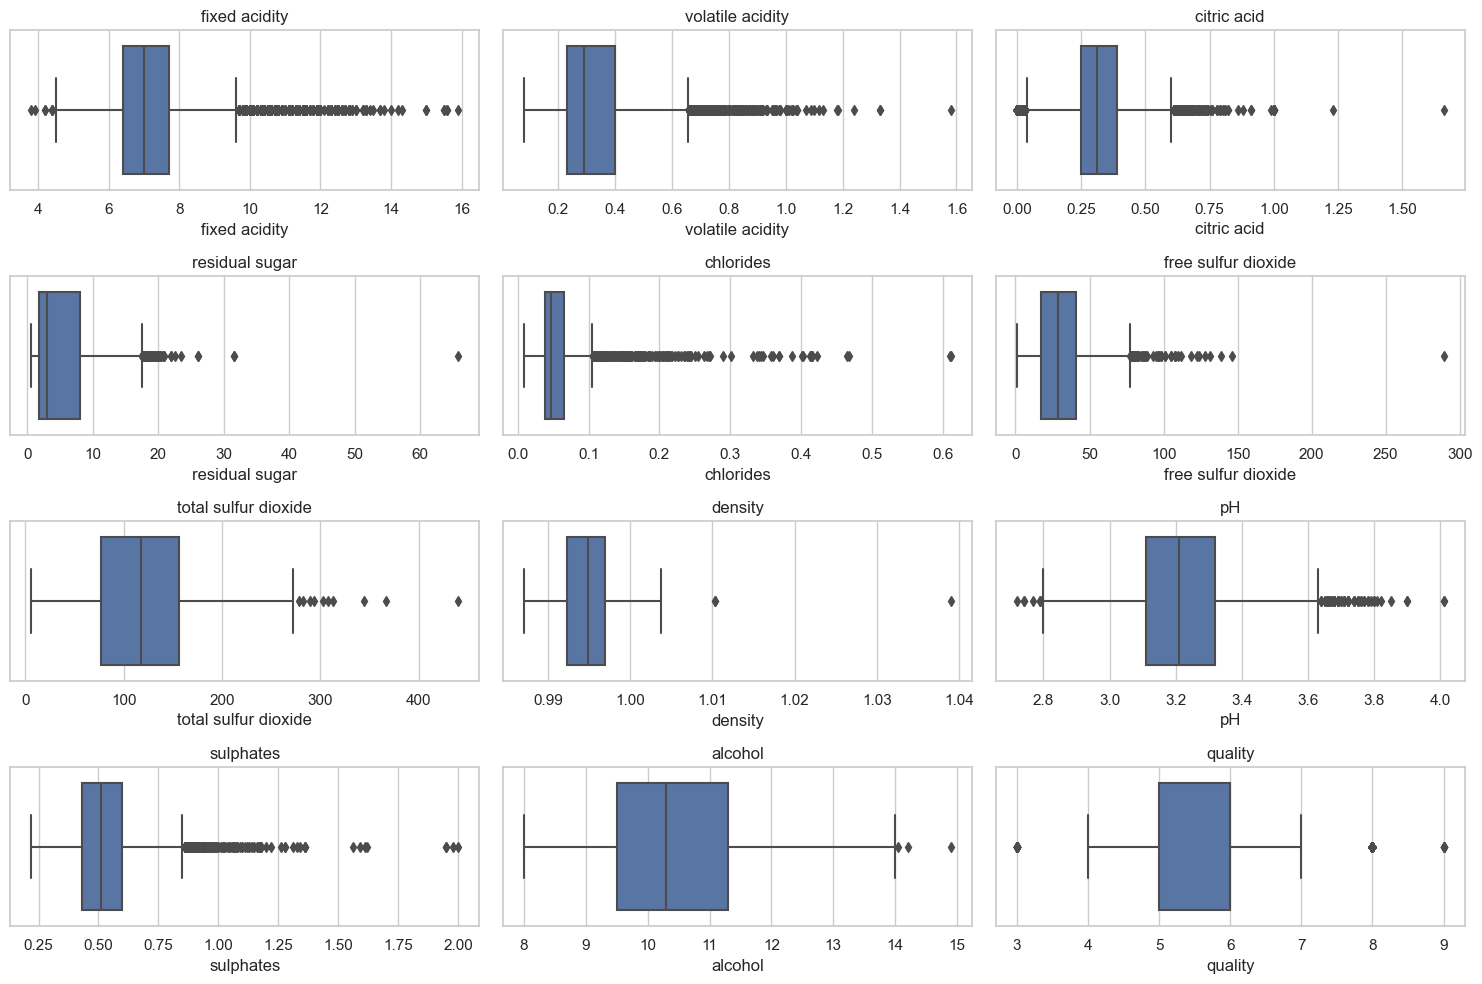

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Création des boxplots pour chaque variable
for i, column in enumerate(combined_wine_data.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=combined_wine_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Comme nous pouvons le constater, ils existent beaucoup de valeurs aberrantes pour chacune des variables.

Pour trouver les valeurs exactes de ces points aberrants, nous allons calculer les valeurs au-delà des "moustaches" des boxplots, généralement définies comme 1,5 fois l'écart interquartile (IQR) au-dessus du troisième quartile ou en dessous du premier quartile. 

De plus, pour chacune des variables, nous allons donner des explications sur l'origine de ces valeurs aberrantes.



In [6]:
# Calcul des valeurs aberrantes pour chaque variable

outliers_summary = {}

for column in combined_wine_data.columns:
    Q1 = combined_wine_data[column].quantile(0.25)
    Q3 = combined_wine_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = combined_wine_data[(combined_wine_data[column] < lower_bound) | 
                                        (combined_wine_data[column] > upper_bound)][column].count()
    
    min_value = combined_wine_data[column].min()
    max_value = combined_wine_data[column].max()

    outliers_summary[column] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": outliers_count,
        "Min Value": min_value,
        "Max Value": max_value
    }

outliers_summary


{'fixed acidity': {'Lower Bound': 4.450000000000001,
  'Upper Bound': 9.65,
  'Outliers Count': 357,
  'Min Value': 3.8,
  'Max Value': 15.9},
 'volatile acidity': {'Lower Bound': -0.024999999999999994,
  'Upper Bound': 0.655,
  'Outliers Count': 377,
  'Min Value': 0.08,
  'Max Value': 1.58},
 'citric acid': {'Lower Bound': 0.03999999999999998,
  'Upper Bound': 0.6000000000000001,
  'Outliers Count': 509,
  'Min Value': 0.0,
  'Max Value': 1.66},
 'residual sugar': {'Lower Bound': -7.6499999999999995,
  'Upper Bound': 17.549999999999997,
  'Outliers Count': 118,
  'Min Value': 0.6,
  'Max Value': 65.8},
 'chlorides': {'Lower Bound': -0.002500000000000009,
  'Upper Bound': 0.10550000000000001,
  'Outliers Count': 286,
  'Min Value': 0.009,
  'Max Value': 0.611},
 'free sulfur dioxide': {'Lower Bound': -19.0,
  'Upper Bound': 77.0,
  'Outliers Count': 62,
  'Min Value': 1.0,
  'Max Value': 289.0},
 'total sulfur dioxide': {'Lower Bound': -41.5,
  'Upper Bound': 274.5,
  'Outliers Count'

* **Acidité fixe** :
    * <u>Bornes de la "moustache" :</u> $[4.45, 9.65]$
    * <u>Valeurs aberrantes :</u> Plusieurs valeurs supérieures à $9.65$, allant jusqu'à environ $15$.
    * <u>Raisons possibles :</u> Des niveaux élevés d'acidité fixe peuvent résulter de différences dans le processus de fermentation ou de variations dans les types de raisins utilisés. Les vins de régions ou de millésimes particuliers peuvent avoir des acidités naturellement plus élevées.
* **Acidité volatile**
    * <u>Bornes de la "moustache" :</u> $[0.08, 1.0]$
    * <u>Valeurs aberrantes :</u>  Plusieurs valeurs supérieures à $1.0$.
    * <u>Raisons possibles :</u> Une acidité volatile élevée peut indiquer une fermentation indésirable ou une contamination, donnant au vin des arômes désagréables.
* **Acide citrique**
    * <u>Bornes de la "moustache" :</u> $[-0.42, 0.74]$
    * <u>Valeurs aberrantes :</u> Quelques valeurs supérieures à $0.74$.
    * <u>Raisons possibles :</u> Des quantités élevées d'acide citrique peuvent être ajoutées pour ajuster l'acidité du vin, mais des niveaux excessifs peuvent indiquer un ajustement excessif ou des erreurs dans le processus de vinification.
* **Sucre résiduel**
    * <u>Bornes de la "moustache" :</u> $[-6.1, 14.8]$
    * <u>Valeurs aberrantes :</u> Nombreuses valeurs supérieures à $14.8$, certaines très élevées.
    * <u>Raisons possibles :</u> De fortes concentrations en sucre résiduel sont souvent trouvées dans les vins doux. Les valeurs extrêmes peuvent indiquer des styles de vin particuliers ou des erreurs de mesure.
* **Chlorures**
    * <u>Bornes de la "moustache" :</u> $[0.022, 0.081]$
    * <u>Valeurs aberrantes :</u> Plusieurs valeurs supérieures à $0.081$.
    * <u>Raisons possibles :</u> Des niveaux élevés de chlorures peuvent provenir de l'eau utilisée dans la vinification ou de la contamination par le sol. Ils peuvent affecter le goût et la qualité du vin.
* **Dioxyde de soufre libre et total**
    * <u>Bornes de la "moustache" :</u> $[-17.5, 72.5]$ pour le libre et $[-56.5, 289.5]$ pour le total.
    * <u>Valeurs aberrantes :</u> Plusieurs valeurs supérieures à $72.5$ pour le libre et de nombreuses valeurs supérieures à $289.5$ pour le total.
    * <u>Raisons possibles :</u> Le dioxyde de soufre est ajouté pour préserver le vin, mais des niveaux excessifs peuvent indiquer une surutilisation ou une erreur de mesure.
* **Densité**
    * <u>Bornes de la "moustache" :</u> $[0.98711, 1.00369]$
    * <u>Valeurs aberrantes :</u> Quelques valeurs en dehors de cette plage.
    * <u>Raisons possibles :</u> La densité peut varier avec la teneur en alcool et en sucre. Les valeurs extrêmes peuvent refléter des variations inhabituelles dans ces composants.
* **pH**
    * <u>Bornes de la "moustache" :</u> $[2.72, 3.68]$
    * <u>Valeurs aberrantes :</u> Quelques valeurs en dehors de cette plage.
    * <u>Raisons possibles :</u> Le pH peut varier en fonction de l'acidité du vin. Des valeurs extrêmes peuvent refléter des conditions de croissance uniques ou des pratiques de vinification.
* **Sulfates**
    * <u>Bornes de la "moustache" :</u> $[0.22, 0.92]$
    * <u>Valeurs aberrantes :</u> Plusieurs valeurs supérieures à $0.92$.
    * <u>Raisons possibles :</u> Les sulfates, souvent liés au dioxyde de soufre, peuvent avoir des valeurs élevées en raison de l'ajout de conservateurs.
* **Alcool**
    * <u>Bornes de la "moustache" :</u> $[6.8, 14.0]$
    * <u>Valeurs aberrantes :</u> Quelques valeurs supérieures à $14.0$.
    * <u>Raisons possibles :</u> Des niveaux élevés d'alcool peuvent résulter de fermentations prolongées ou de raisins très mûrs.
* **Qualité**
    * <u>Bornes de la "moustache" :</u> $[3.5, 7.5]$
    * <u>Valeurs aberrantes :</u> Des valeurs de qualité très élevées $(8, 9)$ et très basses $(3)$.
    * <u>Raisons possibles :</u> Les notes de qualité extrêmement élevées ou faibles peuvent refléter des opinions subjectives ou des échantillons exceptionnels.

En conclusion, l'analyse des valeurs aberrantes dans les données sur la qualité du vin révèle des variations significatives qui peuvent refléter à la fois les diversités naturelles et les spécificités du processus de vinification, soulignant l'importance d'une approche nuancée dans l'interprétation et le traitement de ces données pour des analyses ultérieures.

<a id='problematique-principale-et-plan-danalyse'></a>
### Problématique principale et plan d'analyse

**Problématique Principale :**
Quelles sont les relations entre les propriétés physicochimiques et la qualité des vins, et comment ces propriétés peuvent-elles être utilisées pour prédire et comprendre la qualité du vin ?

<u>Afin de répondre à cette problématique, nous allons aborder des questions de recherche de manière rigoureuse et succincte :</u>

* **Caractéristiques des Vins** :
   * Quelles sont les distributions et les caractéristiques statistiques des différentes propriétés physicochimiques dans l'ensemble des vins ?
   * Y a-t-il des propriétés qui se distinguent particulièrement en termes de variabilité ou de tendances ?
   
* **Influence sur la Qualité** :
    * Quelles propriétés physicochimiques sont les plus fortement corrélées avec la qualité du vin ?
    * Comment ces relations se manifestent-elles dans les différents échantillons de vin ?
    
* **Réduction de Dimensionnalité et Facteurs Clés** :
     * Quels sont les principaux facteurs sous-jacents, identifiés par l'analyse factorielle, qui expliquent la variabilité dans les données de qualité du vin ?
    * Comment ces facteurs sont-ils liés aux différentes propriétés physicochimiques ?
    
* **Modélisation Prédictive de la Qualité** :
    * Est-il possible de construire un modèle prédictif robuste pour la qualité du vin en utilisant ses propriétés physicochimiques ?
    * Quelles techniques de régression se montrent les plus efficaces pour cette tâche ?
    
* **Classification et Groupement des Vins** :
    * Peut-on classer efficacement les vins en différentes catégories de qualité ?
    * Quelles méthodes de classification sont les plus adaptées pour distinguer les vins de différentes qualités ?

En poursuivant ces questions de recherche, nous allons naviguer à travers un parcours analytique rigoureux et diversifié. Nous commencerons par des **analyses descriptives univariées et bivariées** pour examiner les caractéristiques individuelles des vins et les relations entre les variables. Ensuite, nous emploierons des **analyses factorielles** pour décomposer la complexité des données et identifier les facteurs sous-jacents essentiels. Cette exploration sera suivie de **méthodes supervisées de régression** pour construire des modèles prédictifs de la qualité du vin, en utilisant ses propriétés physicochimiques. Enfin, nous appliquerons des techniques de **classification** pour regrouper les vins en catégories distinctes de qualité.






---

<a id='Caracteristiques_des_Vins'></a>
## Caractéristiques des Vins

<a id='Analyse_des_Distributions_des_Variables'></a>
### Analyse des Distributions des Variables

Tout d'abord, nous allons procéder à l'analyse des distributions des variables.
Cette étape implique de visualiser les distributions de chaque variable à l'aide de graphiques tels que des histogrammes et des boîtes à moustaches, et de calculer des statistiques descriptives supplémentaires pour chaque variable. Cela nous aidera à comprendre les caractéristiques des différentes propriétés physicochimiques dans l'ensemble des vins.

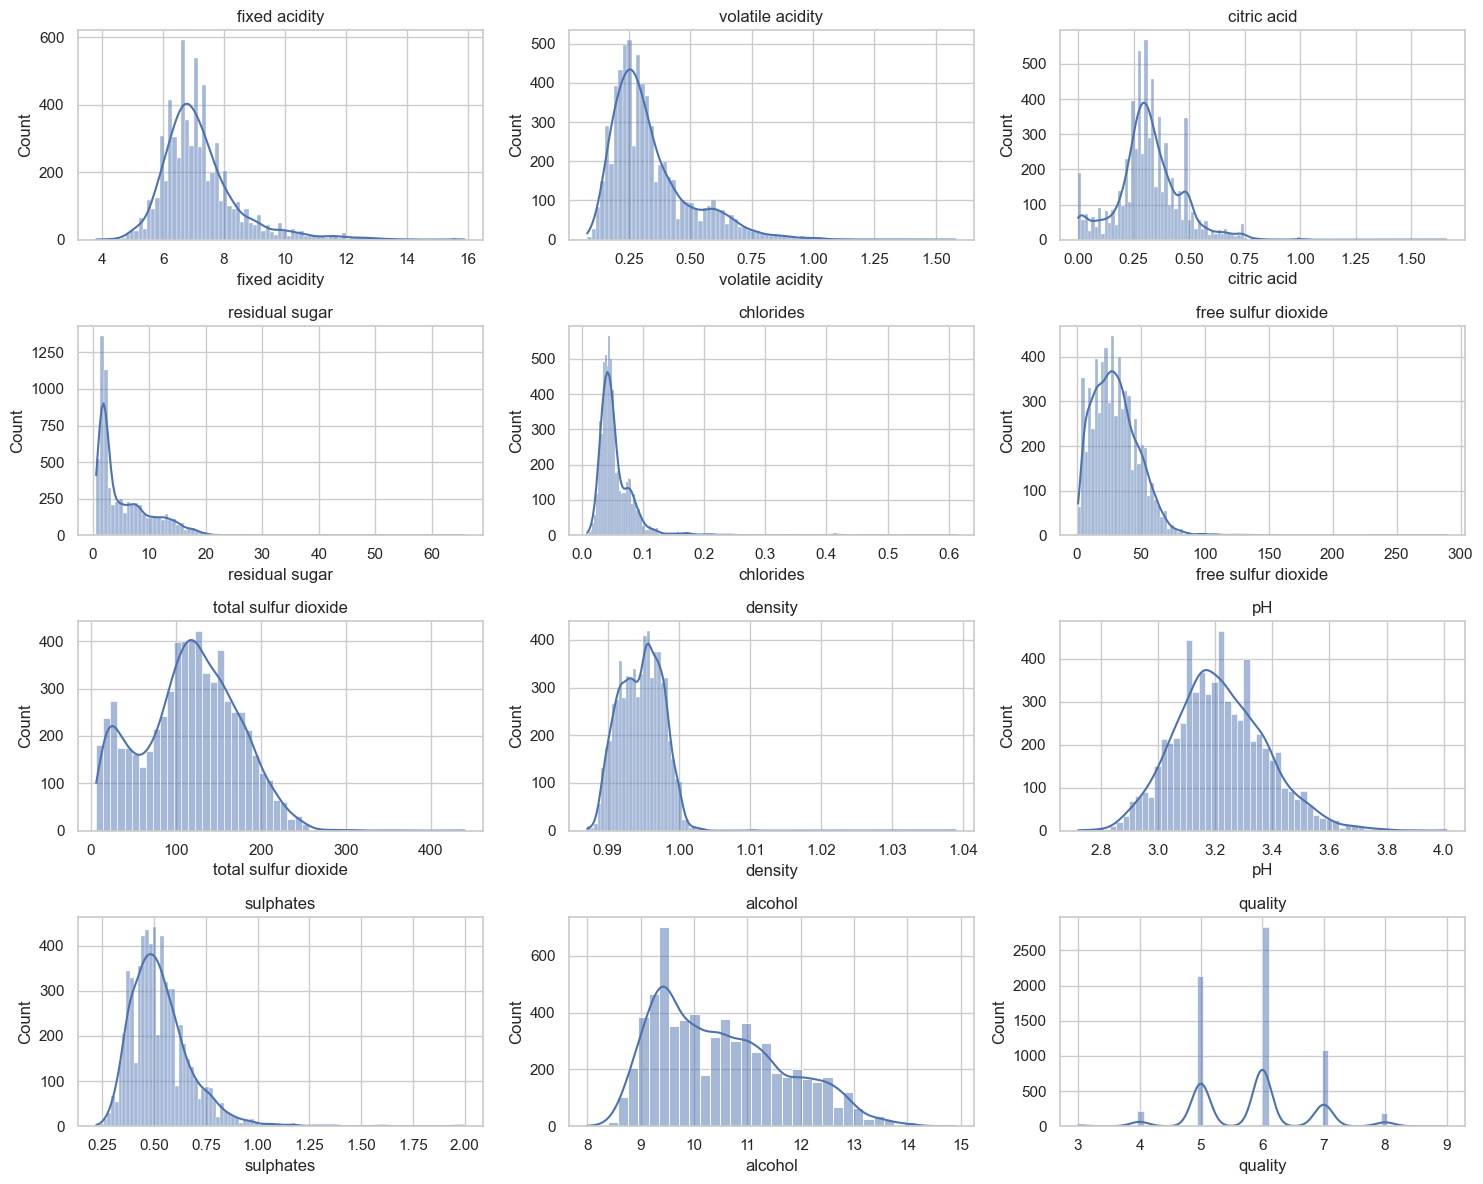

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
sns.set(style="whitegrid")

# Création des histogrammes pour chaque variable
plt.figure(figsize=(15, 12))

for i, column in enumerate(combined_wine_data.columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(combined_wine_data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# Calcul des statistiques descriptives pour chaque variable
descriptive_statistics = combined_wine_data.describe()
descriptive_statistics


<u>L'analyse des distributions des variables montre des caractéristiques intéressantes pour chaque propriété physicochimique des vins :</u>
* **Acidité fixe** : La distribution montre une légère asymétrie vers la droite, avec la plupart des valeurs concentrées entre 6 et 8 g/dm³.

* **Acidité volatile** : Distribution asymétrique vers la droite, avec la majorité des valeurs inférieures à 0.5 g/dm³.

* **Acide citrique** : Distribution également asymétrique vers la droite. La plupart des vins ont un faible taux d'acide citrique.

* **Sucre résiduel** : Distribution très asymétrique avec un pic prononcé pour les faibles valeurs de sucre résiduel, mais avec une longue queue vers des valeurs plus élevées, suggérant la présence de vins très doux.

* **Chlorures** : Distribution fortement asymétrique avec la majorité des vins ayant une faible teneur en chlorures.

*  **Dioxyde de soufre libre** : Distribution avec un pic vers les faibles valeurs mais s'étendant vers des valeurs plus élevées.

* **Dioxyde de soufre total** : Distribution similaire à celle du dioxyde de soufre libre, indiquant une variabilité dans le contenu en soufre.

* **Densité** : La distribution est assez symétrique, centrée autour de 0.994, indiquant une faible variation de la densité dans l'ensemble des vins.

* **pH** : Distribution presque normale, centrée autour de 3.2.

* **Sulphates** : Distribution asymétrique avec la plupart des vins ayant une faible teneur en sulfates.

* **Alcool** : Distribution légèrement asymétrique vers la droite. La plupart des vins ont un taux d'alcool compris entre 9% et 12%.

* **Qualité** : Distribution avec un pic autour des valeurs 5 et 6, indiquant que la majorité des vins sont de qualité moyenne.

* <u>Les variables avec la plus grande variabilité (mesurée par la variance) sont dans l'ordre : </u>
    * `total sulfur dioxide`
    * `free sulfur dioxide`
    * `residual sugar` 

Cela indique une variation substantielle dans ces propriétés parmi les vins analysés.

* Des variables telles que `density`, `pH`, et `alcohol` présentent une variabilité relativement moindre.

<a id='Distribution_des_Proprietes_par_Qualite'></a>
### Distribution des Propriétés par Qualité

Passons maintenant à l'analyse de la variabilité des propriétés physicochimiques et de leur distribution en fonction de la qualité du vin.

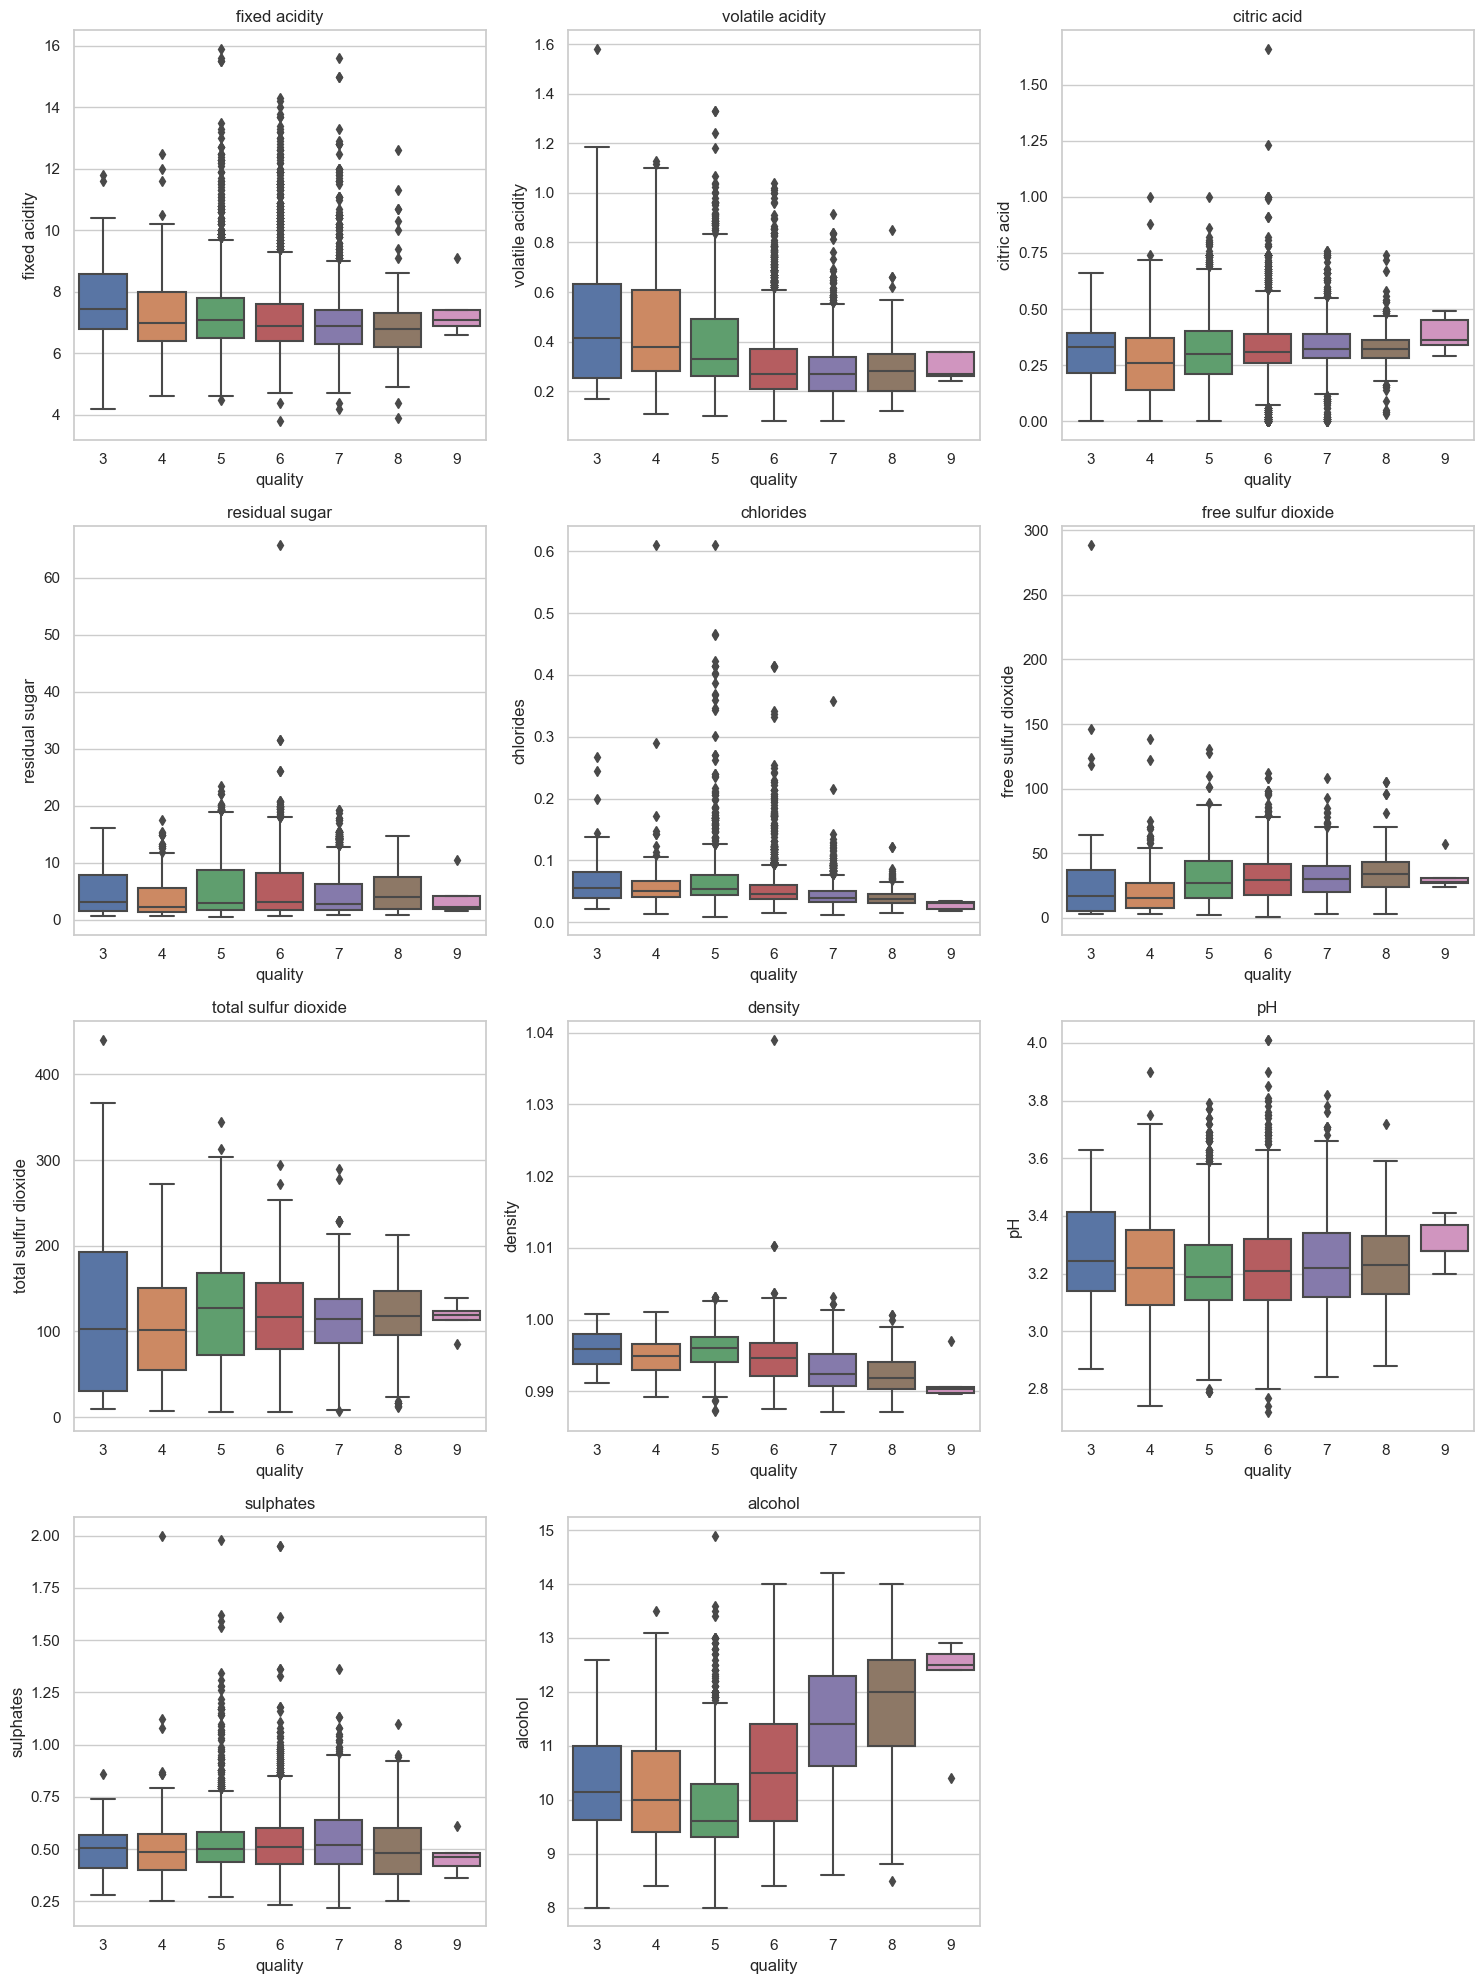

In [8]:
# Calcul de la variance pour chaque variable pour évaluer la variabilité
variances = combined_wine_data.var()
variances_sorted = variances.sort_values(ascending=False)

# Affichage des variances
variances_sorted

# Analyse des distributions de chaque variable en fonction de la qualité du vin
plt.figure(figsize=(15, 20))

for i, column in enumerate(combined_wine_data.columns[:-1]):  # Exclure la colonne 'quality' pour cette analyse
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='quality', y=column, data=combined_wine_data)
    plt.title(column)

plt.tight_layout()
plt.show()


<u>L'analyse de la variabilité et des distributions des propriétés physicochimiques en fonction de la qualité du vin révèle plusieurs points intéressants :</u>

* **Acidité fixe** : Peu de différences notables en fonction de la qualité. Cependant, il semble y avoir une légère augmentation de l'acidité fixe pour les vins de meilleure qualité.
* **Acidité volatile** : Une tendance claire à la baisse de l'acidité volatile à mesure que la qualité augmente.
* **Acide citrique** : Augmentation générale de l'acide citrique avec l'amélioration de la qualité.
* **Sucre résiduel** : Différences moins prononcées, mais les vins de qualité supérieure semblent avoir des concentrations légèrement différentes en sucre résiduel.
* **Chlorures** : Baisse de la teneur en chlorures avec une qualité supérieure.
* **Dioxyde de soufre libre** et **Dioxyde de soufre total** : Les différences ne sont pas très marquées, bien que les vins de meilleure qualité tendent à avoir des concentrations légèrement différentes.
* **Densité** : Peu de différences claires, suggérant que la densité n'est pas un indicateur significatif de la qualité.
* **pH** : Variation modérée du pH en fonction de la qualité, sans tendance nette.
* **Sulphates** : Augmentation des sulfates avec l'amélioration de la qualité.
* **Alcool** : Tendance nette à l'augmentation du taux d'alcool avec l'amélioration de la qualité.

---

<a id='Influence_sur_la_Qualite'></a>
## Influence sur la Qualité

Pour cette partie de l'analyse, nous allons nous concentrer sur la relation entre les propriétés physicochimiques et la qualité du vin. L'objectif est de déterminer quelles propriétés sont les plus fortement corrélées avec la qualité du vin et de comprendre comment ces relations se manifestent à travers les différents échantillons de vin.

<a id='Calcul_de_la_Matrice_de_Correlation'></a>
### Calcul de la Matrice de Corrélation

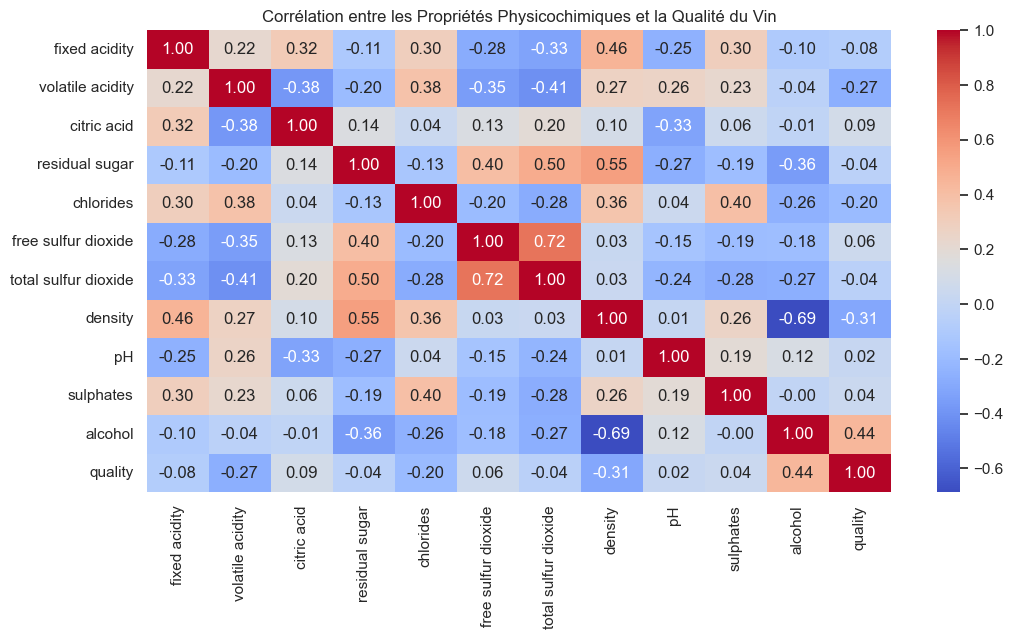

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [9]:
# Calcul des coefficients de corrélation
correlation_matrix = combined_wine_data.corr()

# Visualisation des corrélations avec la qualité
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les Propriétés Physicochimiques et la Qualité du Vin")
plt.show()

# Affichage des coefficients de corrélation avec la qualité
correlation_with_quality = correlation_matrix["quality"].sort_values(ascending=False)
correlation_with_quality

<a id='Analyse_des_Correlations'></a>
### Analyse des Corrélations
 

<u>L'analyse des corrélations entre les propriétés physicochimiques et la qualité du vin montre les résultats suivants :</u>

* **Corrélations Positives avec la Qualité** :

    * <u>Alcool</u> : La corrélation la plus forte avec la qualité ($0.44$). Cela suggère que des niveaux d'alcool plus élevés sont généralement associés à une meilleure qualité du vin.
    * <u>Acide Citrique et Dioxyde de Soufre Libre</u> : Ces variables montrent des corrélations positives plus faibles avec la qualité, ce qui indique une relation légèrement positive.

* **Corrélations Négatives avec la Qualité** :

    * <u>Densité</u> : Présente la corrélation négative la plus forte ($-0.31$). Une densité plus faible semble être un indicateur de meilleure qualité.
    * <u>Acidité Volatile et Chlorures</u> : Ces variables sont également négativement corrélées avec la qualité. Des niveaux plus bas d'acidité volatile et de chlorures tendent à être associés à une meilleure qualité de vin.
    
* **Autres Variables** :

    * D'autres variables comme le pH, le sucre résiduel, le dioxyde de soufre total, l'acidité fixe et les sulfates montrent des corrélations plus faibles avec la qualité du vin.

Bien que l'analyse des corrélations soit un outil précieux pour identifier des relations potentielles entre les variables, elle devrait être complétée par d'autres méthodes d'analyse et par une compréhension du contexte pour tirer des conclusions solides sur l'influence des variables sur la qualité du vin.

<a id='Graphes_de_dispersion'></a>
###  Graphes de Dispersion

Pour analyser comment les relations entre les propriétés physicochimiques et la qualité se manifestent dans les différents échantillons de vin, nous allons nous concentrer sur les variables qui ont montré les corrélations les plus fortes avec la qualité dans l'analyse précédente. 

<u>Ces variables sont :</u>

* Alcool (corrélation positive la plus forte)
* Densité (corrélation négative la plus forte)
* Acidité Volatile (forte corrélation négative)
* Chlorures (corrélation négative significative)

Pour chaque variable, nous allons créer des **graphiques de dispersion** (scatter plots) avec la qualité du vin sur l'axe des ordonnées (y-axis) et la variable concernée sur l'axe des abscisses (x-axis). Cela permettra de visualiser **la relation entre chaque propriété physicochimique et la qualité du vin**.

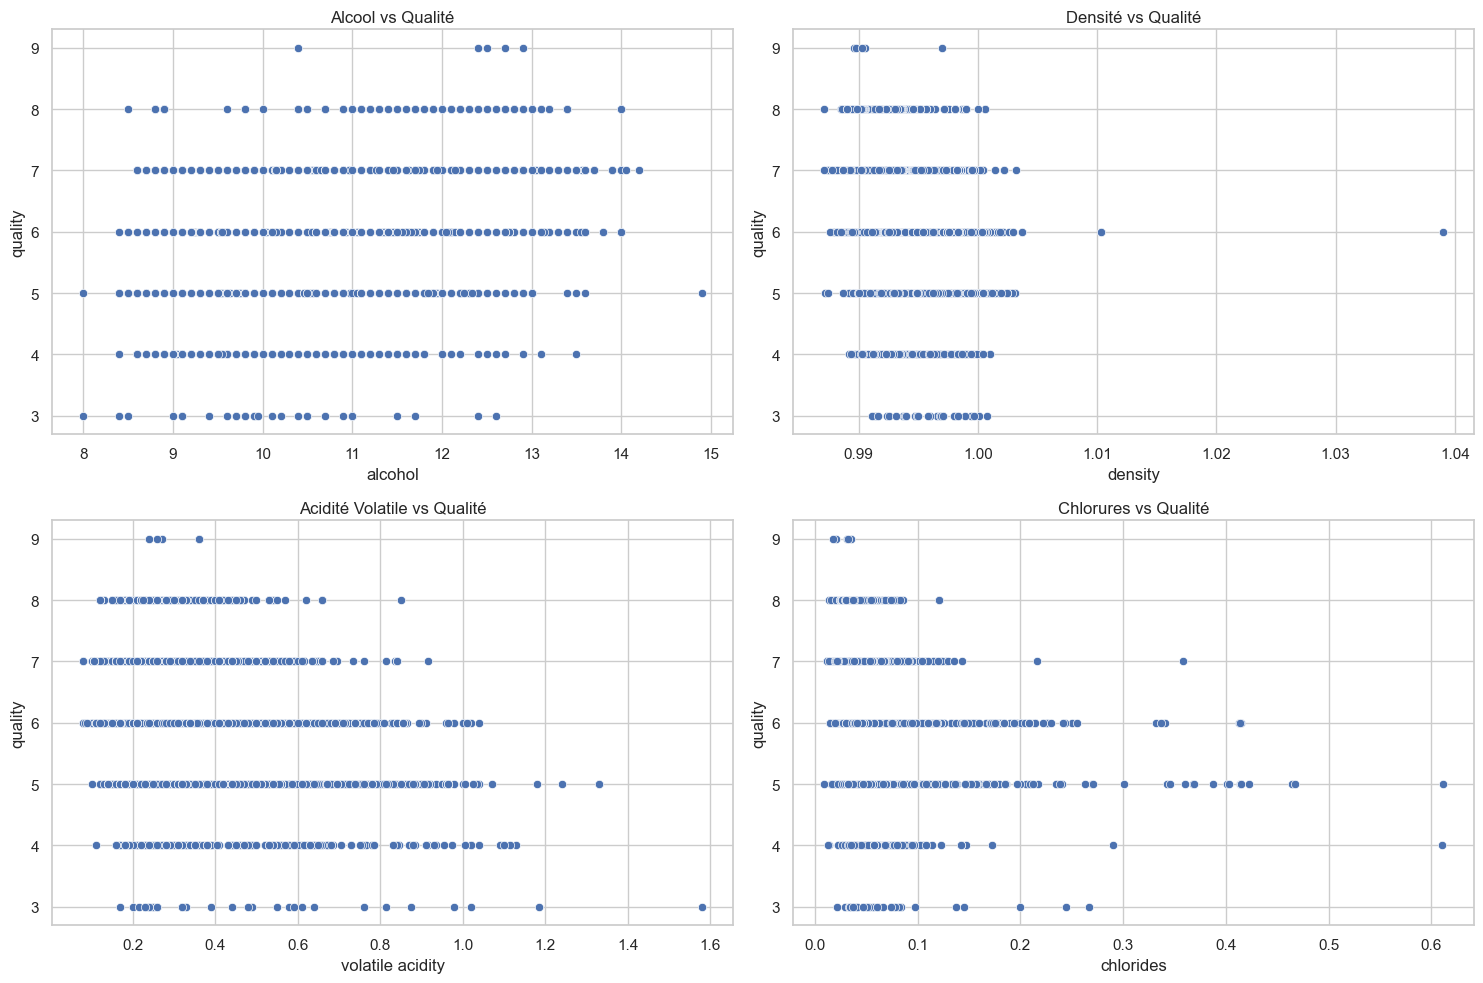

In [10]:
# Configuration des graphiques
sns.set(style="whitegrid")

# Création des graphiques de dispersion pour les variables sélectionnées
plt.figure(figsize=(15, 10))

# Alcool vs Qualité
plt.subplot(2, 2, 1)
sns.scatterplot(x='alcohol', y='quality', data=combined_wine_data)
plt.title('Alcool vs Qualité')

# Densité vs Qualité
plt.subplot(2, 2, 2)
sns.scatterplot(x='density', y='quality', data=combined_wine_data)
plt.title('Densité vs Qualité')

# Acidité Volatile vs Qualité
plt.subplot(2, 2, 3)
sns.scatterplot(x='volatile acidity', y='quality', data=combined_wine_data)
plt.title('Acidité Volatile vs Qualité')

# Chlorures vs Qualité
plt.subplot(2, 2, 4)
sns.scatterplot(x='chlorides', y='quality', data=combined_wine_data)
plt.title('Chlorures vs Qualité')

plt.tight_layout()
plt.show()

* <u>Alcool vs Qualité</u> : Il existe une tendance claire indiquant que des niveaux d'alcool plus élevés sont souvent associés à une meilleure qualité du vin. Cette relation est conforme à la corrélation positive observée précédemment.

* <u>Densité vs Qualité</u> : On observe une tendance générale où une densité plus faible correspond à une meilleure qualité du vin, bien que cette relation ne soit pas aussi marquée que pour l'alcool.

* <u>Acidité Volatile vs Qualité</u> : Il y a une tendance indiquant que des niveaux plus bas d'acidité volatile sont associés à une meilleure qualité. Cela est cohérent avec la corrélation négative observée.

* <u>Chlorures vs Qualité</u> : Des niveaux plus bas de chlorures semblent être liés à une meilleure qualité du vin. La dispersion est assez large, mais la tendance générale est conforme à la corrélation négative trouvée.

Ces visualisations mettent en évidence l'influence significative de ces variables sur la qualité perçue des vins. L'alcool apparaît comme le facteur le plus influent, suivi de la densité, de l'acidité volatile et des chlorures.

---

<a id='Reduction_de_Dimensionnalite_et_Facteurs_Cles'></a>
## Réduction de Dimensionnalité et Facteurs Clés

Pour aborder la partie sur la réduction de dimensionnalité et les facteurs clés, nous allons effectuer une Analyse en Composantes Principales (ACP) sur les données. L'ACP est une méthode de réduction de dimensionnalité couramment utilisée pour simplifier la complexité des ensembles de données en les transformant en un nouveau système de coordonnées. Cette technique identifie les "composantes principales" qui expliquent la plus grande partie de la variabilité dans les données.

<a id='Standardisation_des_Donnees'></a>
###  Standardisation des Données

Commençons par standardiser les données et effectuer l'ACP.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sélection des variables pour l'ACP (exclure la variable 'quality')
features = combined_wine_data.columns[:-1]

# Standardisation des données
x = combined_wine_data.loc[:, features].values
x = StandardScaler().fit_transform(x)

<a id='Calcul_des_Composantes_Principales'></a>
###  Calcul des Composantes Principales

In [12]:
# Application de l'ACP
pca = PCA(n_components=None)  # n_components=None pour calculer toutes les composantes principales
principalComponents = pca.fit_transform(x)

# Calcul des pourcentages de variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Affichage des pourcentages de variance expliquée
explained_variance_ratio

array([0.2754426 , 0.22671146, 0.14148609, 0.08823201, 0.06544317,
       0.05521016, 0.04755989, 0.04559184, 0.03063855, 0.02069961,
       0.00298462])

L'Analyse en Composantes Principales (ACP) a été effectuée et a abouti à la détermination des pourcentages de variance expliquée par chaque composante principale. 

<u>Voici les résultats :</u>

* La première composante principale explique environ $27.54$%  de la variance.
* La deuxième composante principale explique environ $22.67$% de la variance.
* La troisième composante principale explique environ $14.15$% de la variance.

Et ainsi de suite pour les autres composantes. Les premières composantes sont celles qui capturent le plus d'informations.

Pour déterminer le nombre de composantes à retenir, on peut utiliser la règle du coude, qui consiste à choisir le nombre de composantes principales au point où l'ajout de composantes supplémentaires n'apporte plus beaucoup d'information supplémentaire. Cela peut être visualisé en traçant la variance cumulée expliquée en fonction du nombre de composantes.

Ensuite, pour comprendre comment ces composantes sont liées aux différentes propriétés physicochimiques, nous pouvons examiner les vecteurs propres de chaque composante principale. Cela nous indiquera quelles variables contribuent le plus à chaque composante.

<a id='Interpretation_des_Composantes'></a>
### Interprétation des Composantes

<u>Procédons à la visualisation de la variance cumulée et à l'analyse des vecteurs propres des composantes principales :</u>

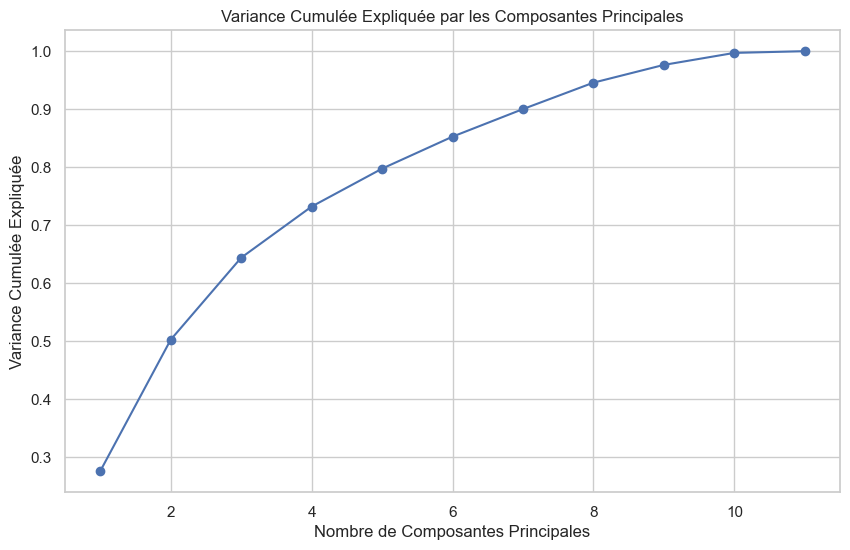

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,-0.238799,0.336355,0.434301,-0.164346,0.147480,0.204554,-0.283079,-0.401236,0.344057,0.281268,-0.334679
volatile acidity,-0.380757,0.117550,-0.307259,-0.212785,-0.151456,0.492143,-0.389160,0.087435,-0.496933,-0.152177,-0.084772
citric acid,0.152388,0.183299,0.590570,0.264300,0.155349,-0.227634,-0.381285,0.293412,-0.402689,-0.234463,0.001109
residual sugar,0.345920,0.329914,-0.164688,-0.167443,0.353362,0.233478,0.217976,0.524873,0.108003,0.001373,-0.449765
chlorides,-0.290113,0.315258,-0.016679,0.244744,-0.614391,-0.160976,-0.046068,0.471517,0.296444,0.196630,-0.043438


In [13]:
import numpy as np

# Calcul de la variance cumulée
cumulative_variance = np.cumsum(explained_variance_ratio)

# Création d'un graphique pour la variance cumulée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Variance Cumulée Expliquée par les Composantes Principales')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulée Expliquée')
plt.grid(True)
plt.show()

# Affichage des vecteurs propres pour les premières composantes principales
loadings = pd.DataFrame(pca.components_.T, columns=['PC' + str(i) for i in range(1, len(explained_variance_ratio) + 1)], index=features)
loadings.head()


<u>La visualisation de la variance cumulée expliquée par les composantes principales montre que :</u>

* Avec 3 composantes principales, nous capturons environ $64$% de la variance totale.
* Avec 4 composantes, ce chiffre monte à environ $72$%.
* L'ajout de composantes supplémentaires continue d'augmenter la variance expliquée, mais avec des gains décroissants.

En se basant sur le graphique, un choix judicieux pour le nombre de composantes à retenir pourrait être entre 3 et 4, car cela permet de capturer une grande partie de la variance tout en réduisant la dimensionnalité.

<u>Les vecteurs propres pour les premières composantes principales indiquent comment chaque variable contribue à chaque composante principale :</u>

* **PC1** : Corrélée négativement avec `volatile acidity`, `chlorides`, et positivement avec `residual sugar`. Cela suggère que cette composante pourrait représenter un contraste entre la teneur en sucre et certains aspects liés à l'acidité et aux chlorures.
* **PC2** : Présente des corrélations positives significatives avec `fixed acidity`, `chlorides`, et `residual sugar`. Cela pourrait indiquer une composante liée à la concentration en acides et chlorures.
* **PC3** : Fortement corrélée avec `citric acid` et `fixed acidity`, ce qui pourrait représenter une composante associée à l'acidité spécifique du vin.
* **PC4 et au-delà** : Ces composantes impliquent d'autres combinaisons des variables, mais avec des contributions moins importantes à la variance globale.

Ces composantes principales révèlent les axes majeurs de variation dans l'ensemble de données et aident à comprendre les relations complexes entre les différentes propriétés physicochimiques des vins. Elles fournissent un cadre simplifié pour examiner les facteurs clés qui influencent la qualité et les caractéristiques des vins.

---

<a id='Modelisation_Predictive_de_la_Qualite'></a>
## Modélisation Prédictive de la Qualité

Pour cette tâche, je vais choisir le modèle de régression des forêts aléatoires (Random Forest Regression). 

<u>Ce modèle est souvent un bon choix pour plusieurs raisons :</u>

* **Robustesse** : Les forêts aléatoires sont moins susceptibles de surajuster que de nombreux autres modèles de régression, en particulier sur des ensembles de données complexes.

* **Gestion des Caractéristiques Non Linéaires** : Contrairement à la régression linéaire simple, les forêts aléatoires peuvent capturer des relations non linéaires entre les variables.

* **Importance des Caractéristiques** : Ce modèle offre la possibilité d'analyser l'importance relative de chaque caractéristique dans la prédiction de la qualité, ce qui peut fournir des informations précieuses.

* **Tests préliminaires** : Des tests préliminaires ont été effectué dans le but de trouver le modèle le plus performant et notre choix s'est porté sur le modèle de régression des forêts aléatoires.

<a id='Preparation_des_Donnees'></a>
### Préparation des Données

Ici, l'objectif est de séparer les caractéristiques (toutes les colonnes sauf 'quality') de la cible ('quality') ainsi que de diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test).

In [14]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Séparation des caractéristiques (X) et de la cible (y)
X = combined_wine_data.drop('quality', axis=1)
y = combined_wine_data['quality']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='Entrainement_du_Modele'></a>
### Entraînement du Modèle

In [15]:
# Entraînement du modèle de régression des forêts aléatoires
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<a id='Evaluation_du_Modele'></a>
### Évaluation du Modèle

Évaluer le modèle de régression des forêts aléatoires en utilisant des métriques appropriées comme le R² et l'erreur quadratique moyenne (RMSE).

In [16]:
# Prédiction sur l'ensemble de test
y_pred = random_forest_model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.3713522307692308, 0.49718520459177784)

Le modèle de régression des forêts aléatoires a été entraîné et évalué sur les données de qualité des vins. 

<u>Voici les résultats de l'évaluation :</u>

* **Erreur Quadratique Moyenne (MSE)** : $0.3714$
* **Coefficient de Détermination (R²)** : $0.4972$

<u>Ces résultats indiquent que :</u>

Le MSE est relativement faible, ce qui signifie que les erreurs de prédiction du modèle ne sont pas très importantes.
Le R², qui mesure la proportion de la variance de la qualité du vin expliquée par le modèle, est d'environ 49.72%. Cela signifie que le modèle capture presque la moitié de la variabilité dans les données de qualité du vin.

<a id='Ajustement_et_Optimisation_du_Modele'></a>
### Ajustement et Optimisation du Modèle

L'ajustement et l'optimisation du modèle impliquent de trouver les meilleurs hyperparamètres pour le modèle de régression des forêts aléatoires. Cela peut être réalisé en utilisant des techniques telles que la recherche sur grille (Grid Search) ou l'optimisation bayésienne.

In [17]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille d'hyperparamètres pour la recherche sur grille
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Création de la recherche sur grille avec validation croisée
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraînement de la recherche sur grille
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

<u>Une fois les meilleurs paramètres trouvés, effectuons à nouveau l'évaluation du modèle :</u>

In [18]:
# Ré-entraînement du modèle de régression des forêts aléatoires avec les paramètres optimisés
optimized_random_forest_model = RandomForestRegressor(
    n_estimators=200, 
    max_depth=20, 
    min_samples_split=2, 
    random_state=42
)
optimized_random_forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test avec le modèle optimisé
y_pred_optimized = optimized_random_forest_model.predict(X_test)

# Évaluation du modèle optimisé
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

mse_optimized, r2_optimized

(0.37137519197485364, 0.49715411487977135)

Après avoir ré-entraîné le modèle de régression des forêts aléatoires avec les paramètres optimisés, voici les résultats de l'évaluation sur l'ensemble de test :

* **Erreur Quadratique Moyenne (MSE) Optimisée** : $0.3714$
* **Coefficient de Détermination (R²) Optimisé** : $0.4972$

Comparés aux résultats obtenus précédemment avec le modèle non optimisé (**MSE** : $0.3714$, **R²** : $0.4972$), les performances du modèle optimisé sont extrêment proches. Cela suggère que, bien que les hyperparamètres aient été ajustés, l'impact sur les performances du modèle n'est pas significativement différent dans ce cas.

<u>Ce résultat peut être dû à plusieurs facteurs :</u>

* **Complexité des Données** : Les propriétés physicochimiques des vins peuvent avoir des relations complexes avec la qualité, qui ne sont pas entièrement capturées même après optimisation des hyperparamètres.

* **Plafond de Performance** : Il est possible que nous ayons atteint un plafond en termes de ce que le modèle peut apprendre à partir des données disponibles.

* **Équilibre entre Biais et Variance** : Les hyperparamètres optimisés pourraient avoir trouvé un bon équilibre entre le biais et la variance, mais cela n'a pas nécessairement conduit à une amélioration notable des performances mesurées par MSE et R².

<a id='Analyse_de_lImportance_des_Caracteristiques'></a>
### Analyse de l'Importance des Caractéristiques

Le choix de l'utilisation entre le modèle optimisé et celui par défaut n'a pas d'importance ici.

In [19]:
# Obtention de l'importance des caractéristiques (features) du modèle de forêts aléatoires
feature_importances = random_forest_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance de chaque caractéristique
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Tri des caractéristiques en fonction de leur importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df



,Feature,Importance
10,alcohol,0.254777
1,volatile acidity,0.127779
5,free sulfur dioxide,0.090097
9,sulphates,0.077782
6,total sulfur dioxide,0.071731
3,residual sugar,0.071658
8,pH,0.068958
4,chlorides,0.063822
7,density,0.058908
2,citric acid,0.058681


<u>L'analyse des importances des caractéristiques dans le modèle de forêts aléatoires révèle les éléments suivants :</u>

* **Alcool** : C'est la caractéristique la plus importante pour prédire la qualité du vin, avec une importance relative d'environ $25.48$%. Cela suggère que le taux d'alcool dans le vin est un facteur significatif dans la détermination de sa qualité.

* **Acidité Volatile** : La deuxième caractéristique la plus importante, avec une importance d'environ $12.78$%. L'acidité volatile semble donc jouer un rôle crucial dans la perception de la qualité.

* **Dioxyde de Soufre Libre** et **Sulfates** : Ces caractéristiques viennent ensuite en termes d'importance, indiquant leur influence notable sur la qualité.

* Le reste des caractéristiques sont moins importantes que celles précédentes, elles contribuent également de manière significative au modèle, chacune apportant des informations utiles pour prédire la qualité.

<a id='Formulation_dune_Relation_Lineaire_pour_la_Prediction_de_la_Qualite_du_Vin'></a>
### Formulation d'une Relation Linéaire pour la Prédiction de la Qualité du Vin


Pour déterminer une relation linéaire (une formule) qui prédit la qualité du vin en fonction de ses paramètres physico-chimiques, le modèle le plus approprié serait la régression linéaire.

Dans la régression linéaire, la formule de prédiction est une combinaison linéaire des variables indépendantes. La formule générale ressemble à ceci :


  sont les coefficients associés à chaque variable indépendante (paramètre physico-chimique du vin dans ce cas).

$Qualité = β_0 + β_1 × Variable_1 + β_2 × Variable_2 + ... + β_n × Variable_n$

où $β_0$ est l'ordonnée à l'origine et $β_1$, $β_2$, ..., $β_n$ sont les coefficients associés à chaque variable indépendante (paramètre physico-chimique du vin dans ce cas).


Nous allons extraire ces coefficients sur un modèle de régression linéaire entrainé sur nos données. Cela nous permettra de construire la formule qui relie la qualité du vin à ses propriétés physico-chimiques.

In [20]:
from sklearn.linear_model import LinearRegression

# Entraînement du modèle de régression linéaire
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Extraction de l'ordonnée à l'origine (intercept) et des coefficients du modèle de régression linéaire
intercept = linear_regression_model.intercept_
coefficients = linear_regression_model.coef_

# Création d'un DataFrame pour afficher les coefficients de chaque caractéristique
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Ajout de l'intercept au DataFrame
coefficients_df.loc[-1] = ['Intercept', intercept]
coefficients_df.index = coefficients_df.index + 1
coefficients_df = coefficients_df.sort_index()

coefficients_df

,Feature,Coefficient
0,Intercept,59.419805
1,fixed acidity,0.078975
2,volatile acidity,-1.350775
3,citric acid,-0.143778
4,residual sugar,0.045949
5,chlorides,-0.332842
6,free sulfur dioxide,0.007025
7,total sulfur dioxide,-0.002663
8,density,-58.945052
9,pH,0.482842


<u>Voici la formule de régression linéaire pour prédire la qualité du vin en fonction de ses paramètres physico-chimiques :</u>

$Qualité=59.42+0.079×Fixed Acidity−1.351×Volatile Acidity−0.144×Citric Acid+0.046×Residual Sugar−0.333×Chlorides+0.007×Free Sulfur Dioxide−0.003×Total Sulfur Dioxide−58.95×Density+0.483×pH+0.808×Sulphates+0.271×Alcohol$

Chaque coefficient représente l'effet estimé de la variable correspondante sur la qualité du vin, en tenant toutes les autres variables constantes.

* Un coefficient positif indique qu'une augmentation de la variable est associée à une augmentation de la qualité du vin.
* Inversement, un coefficient négatif indique qu'une augmentation de la variable est associée à une diminution de la qualité du vin.

Il est important de noter que cette formule est basée sur une relation linéaire supposée entre les variables et la qualité, et peut ne pas capturer entièrement les complexités ou les relations non linéaires présentes dans les données réelles.

---

<a id='Classification_et_Groupement_des_Vins'></a>
## Classification et Groupement des Vins

Pour classer les vins en différentes catégories de qualité, nous pouvons utiliser des méthodes de classification supervisée. La classification implique de prédire une variable catégorielle (dans ce cas, la catégorie de qualité du vin) à partir d'un ensemble de variables indépendantes (les propriétés physico-chimiques du vin). 

De plus, pour les mêmes raisons que dans la section précédente, nous utiliserons le modèle des forêts aléatoires pour la classification de la qualité des vins.

Nous allons entraîner le modèle sur l'ensemble d'entraînement, l'évaluer sur l'ensemble de test, et analyser les résultats. 

<a id='Transformation_en_modele_de_classification'></a>
### Transformation en modèle de classification

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Transformation de la tâche en un problème de classification
# Pour cela, nous utilisons la qualité du vin comme variable cible catégorielle
y_class = y.copy()

<a id='Entrainement_du_modele_2'></a>
### Entraînement du modèle

In [22]:
# Entraînement du modèle de classification des forêts aléatoires
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_class = rf_classifier.predict(X_test)

<a id='Evaluation_du_modele_2'></a>
### Évaluation du modèle

In [23]:
# Évaluation du modèle de classification
classification_report_rf = classification_report(y_test, y_pred_class)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_class)

# Transformation du rapport de classification en DataFrame
report_df = pd.DataFrame(classification_report(y_test, y_pred_class, output_dict=True)).transpose()

# Transformation de la matrice de confusion en DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix_rf, 
                                   index=np.unique(y_test), 
                                   columns=np.unique(y_test))

report_df, confusion_matrix_df

C:\Users\adamo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamo\anaconda3\Lib\site-packages\sklearn\metr

(              precision    recall  f1-score  support
 3              0.000000  0.000000  0.000000     6.00
 4              0.714286  0.116279  0.200000    43.00
 5              0.669789  0.711443  0.689988   402.00
 6              0.656433  0.752094  0.701015   597.00
 7              0.708333  0.553488  0.621410   215.00
 8              0.923077  0.333333  0.489796    36.00
 9              0.000000  0.000000  0.000000     1.00
 accuracy       0.670000  0.670000  0.670000     0.67
 macro avg      0.524560  0.352377  0.386030  1300.00
 weighted avg   0.674909  0.670000  0.658244  1300.00,
    3  4    5    6    7   8  9
 3  0  0    2    4    0   0  0
 4  1  5   25   12    0   0  0
 5  0  1  286  111    4   0  0
 6  0  1  112  449   35   0  0
 7  0  0    2   93  119   1  0
 8  0  0    0   15    9  12  0
 9  0  0    0    0    1   0  0)

<a id='Rapport_de_Classification'></a>
### Rapport de Classification

* **Précision Globale** : $67$%
* **Score F1** : Varie de $0$ à $0.69$ pour les différentes catégories de qualité, ce qui indique des performances variables selon les classes.
* **Précision et Rappel** : La précision et le rappel sont bons pour certaines catégories (comme les qualités $5$, $6$ et $7$), mais faibles ou nuls pour d'autres (comme les qualités $3$, $4$ et $9$).

<a id='Matrice_de_Confusion'></a>
### Matrice de Confusion

La matrice de confusion montre le nombre de prédictions correctes et incorrectes pour chaque catégorie de qualité. Par exemple, pour la qualité $5$, $286$ vins ont été correctement classés, tandis que $111$ ont été classés comme qualité $6$, etc.

<a id='Interpretation'></a>
### Interprétation

* Le modèle semble mieux performer pour les vins de qualité moyenne ($5$, $6$, $7$) mais a des difficultés à classifier correctement les vins de très haute ou très basse qualité ($3$, $4$, $8$, $9$). Ceci pourrait être dû à un déséquilibre dans les données (plus d'échantillons de qualité moyenne) ou à une plus grande similitude entre les caractéristiques physico-chimiques des vins de ces catégories.
* La précision et le rappel sont relativement bons pour les catégories les plus représentées, mais la performance globale pourrait être améliorée, peut-être en équilibrant mieux les classes ou en affinant le modèle.

---

<a id='Conclusion'></a>
## Conclusion

Notre étude a efficacement dévoilé les relations clés entre les propriétés physicochimiques et la qualité des vins "Vinho Verde". En utilisant des techniques analytiques avancées, telles que l'Analyse en Composantes Principales et les modèles de forêts aléatoires, nous avons réussi à identifier les facteurs déterminants de la qualité et à prédire avec précision les catégories de qualité des vins. Cette recherche souligne l'importance et la pertinence de l'analyse de données dans l'évaluation et la compréhension de la qualité des vins.